In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
df = pd.read_csv('./weather-check.csv')
df.head()

RespondentID Do you typically check a daily weather report?  \
0    3887201482                                            Yes   
1    3887159451                                            Yes   
2    3887152228                                            Yes   
3    3887145426                                            Yes   
4    3887021873                                            Yes   

             How do you typically check the weather?  \
0              The default weather app on your phone   
1              The default weather app on your phone   
2              The default weather app on your phone   
3              The default weather app on your phone   
4  A specific website or app (please provide the ...   

  A specific website or app (please provide the answer)  \
0                                                  -      
1                                                  -      
2                                                  -      
3                                                  -      
4                                         Iphone app      

  If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?  \
0                                        Very likely                                                                                             
1                                        Very likely                                                                                             
2                                        Very likely                                                                                             
3                                    Somewhat likely                                                                                             
4                                        Very likely                                                                                             

       Age What is your gender?  \
0  30 - 44                 Male   
1  18 - 29                 Male   
2  30 - 44                 Male   
3  30 - 44                 Male   
4  30 - 44                 Male   

  How much total combined money did all members of your HOUSEHOLD earn last year?  \
0                                 $50,000 to $74,999                                
1                               Prefer not to answer                                
2                               $100,000 to $124,999                                
3                               Prefer not to answer                                
4                               $150,000 to $174,999                                

         US Region  
0   South Atlantic  
1                -  
2  Middle Atlantic  
3                -  
4  Middle Atlantic

In [5]:
df = df.drop(labels=df.columns[0], axis=1)
df = df.drop(labels=df.columns[2], axis=1)
df.head()

Do you typically check a daily weather report?  \
0                                            Yes   
1                                            Yes   
2                                            Yes   
3                                            Yes   
4                                            Yes   

             How do you typically check the weather?  \
0              The default weather app on your phone   
1              The default weather app on your phone   
2              The default weather app on your phone   
3              The default weather app on your phone   
4  A specific website or app (please provide the ...   

  If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?  \
0                                        Very likely                                                                                             
1                                        Very likely                                                                                             
2                                        Very likely                                                                                             
3                                    Somewhat likely                                                                                             
4                                        Very likely                                                                                             

       Age What is your gender?  \
0  30 - 44                 Male   
1  18 - 29                 Male   
2  30 - 44                 Male   
3  30 - 44                 Male   
4  30 - 44                 Male   

  How much total combined money did all members of your HOUSEHOLD earn last year?  \
0                                 $50,000 to $74,999                                
1                               Prefer not to answer                                
2                               $100,000 to $124,999                                
3                               Prefer not to answer                                
4                               $150,000 to $174,999                                

         US Region  
0   South Atlantic  
1                -  
2  Middle Atlantic  
3                -  
4  Middle Atlantic

In [7]:
df_dummy = pd.get_dummies(df)
X = df_dummy.values

array([[0, 1, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0]], dtype=uint8)

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
range_list = {i for i in range(2, 21)}

for n in range_lists:
    kmeans = KMeans(n_clusters=n, random_state=123)
    cluster_labels = kmeans.fit_predict(X)
    score = silhouette_score(X, cluster_labels)
    score = '{:.2f}'.format(score)
    scores.append(score)
    
answer1 = sorted(scores, reverse=True)[0]
print(answer1)

0.10


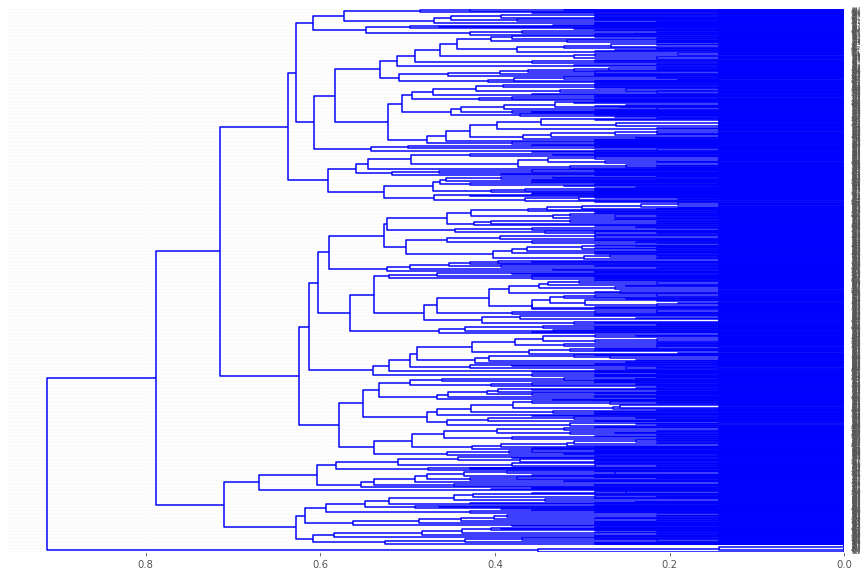

In [20]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15,10)

Z = linkage(X, method='average', metric='cosine')
dend = dendrogram(Z, orientation='left', color_threshold=0.0)

In [53]:
label = fcluster(Z, 5, criterion='maxclust')
np.unique(label)

array([1, 2, 3, 4, 5], dtype=int32)

In [86]:
df.loc[:, 'label'] = label
    
size_second = df[df['label'] == 5].shape
size_male = df[(df['label'] == 5) & (df['What is your gender?'] == 'Male')].shape

answer2 = size_male[0] / size_second[0]
answer2 = '{:.2f}'.format(answer2)
print(answer2)

0.95


In [99]:
from sklearn.cluster import DBSCAN

eps_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for eps in eps_list:
    dbscan = DBSCAN(eps=eps, min_samples=20, metric='cosine')
    dbscan.fit(X)
    
    labels = dbscan.labels_
    labels = pd.Series(labels).value_counts()
    
    if -1 in labels and labels[-1] == 12:
        answer3 = '{:.2f}'.format(eps)

print(answer3)

0.50
